In [1]:
#importing all the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# To display all the columns
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

# Importing the dataset

In [2]:
df = pd.read_csv('train.csv')

# Understand and visualizing data

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [5]:
#Check the shape of the dataframe
df.shape

(1460, 81)

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
df.info() #Checking for numbere of columns and their names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.isnull().sum() # Finding number of nulls

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Here we can See there are missing values so displaying only them in percentages in decending order for better understandability

In [9]:
null_df = df.isnull().sum()/len(df)*100
null_df[null_df>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

# Handing Null values according to data description
### According to the data description provided null values are the facilities which are not present so we are not dropping the feature

In [10]:
df.PoolQC.fillna('No_Pool',inplace = True)

In [11]:
df.MiscFeature.fillna('None',inplace = True)

In [12]:
df.Alley.fillna('No_alley_access',inplace = True)

In [13]:
df.Fence.fillna('No_Fence',inplace = True)

In [14]:
df.FireplaceQu.fillna('No_Fireplace',inplace = True)

In [15]:
df.LotFrontage.value_counts() 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

This feature seems to be not much usefull do we can drop it 

In [16]:
df.drop("LotFrontage",axis = 1, inplace=True)

In [17]:
df.GarageType.fillna('No_Garage',inplace = True)

In [18]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [19]:
df.GarageYrBlt.fillna(df['GarageYrBlt'].mode()[0],inplace = True) # As years can be more useful while analisys we are not dropping them.

In [20]:
df.GarageFinish.fillna('No_Garage',inplace = True)
df.GarageQual.fillna('No_Garage',inplace = True)
df.GarageCond.fillna('No_Garage',inplace = True)

In [21]:
df.BsmtExposure.fillna('No_Basement',inplace = True)
df.BsmtFinType2.fillna('No_Basement',inplace = True)
df.BsmtQual.fillna('No_Basement',inplace = True)
df.BsmtCond.fillna('No_Basement',inplace = True)
df.BsmtFinType1.fillna('No_Basement',inplace = True)

In [22]:
df.MasVnrType.fillna('None',inplace = True)

In [23]:
df.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [24]:
df.MasVnrArea.fillna(df['MasVnrArea'].mode()[0],inplace = True)

In [25]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
df.Electrical.fillna(df['Electrical'].mode()[0],inplace = True) 

In [27]:
null_df = df.isnull().sum()/len(df)*100
null_df[null_df>0].sort_values(ascending=False)

Series([], dtype: float64)

In [28]:
df.isnull().sum() # Finding number of nulls

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [29]:
#Lets drop ID column as it is not important for our analysis
df.drop('Id',axis = 1,inplace = True)

In [30]:
df.nunique()

MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

Here there are no unique columns present now so not dropping them based on this condition

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Here, No null values are present in any features so we can proceed further now.

# Splitting the data into numberical and categorical dataframes for analysis

In [32]:
df_num = df.select_dtypes(include=['int64','float64'])

In [33]:
df_cat = df.select_dtypes(include = ['object'])

In [34]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [35]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

<AxesSubplot:>

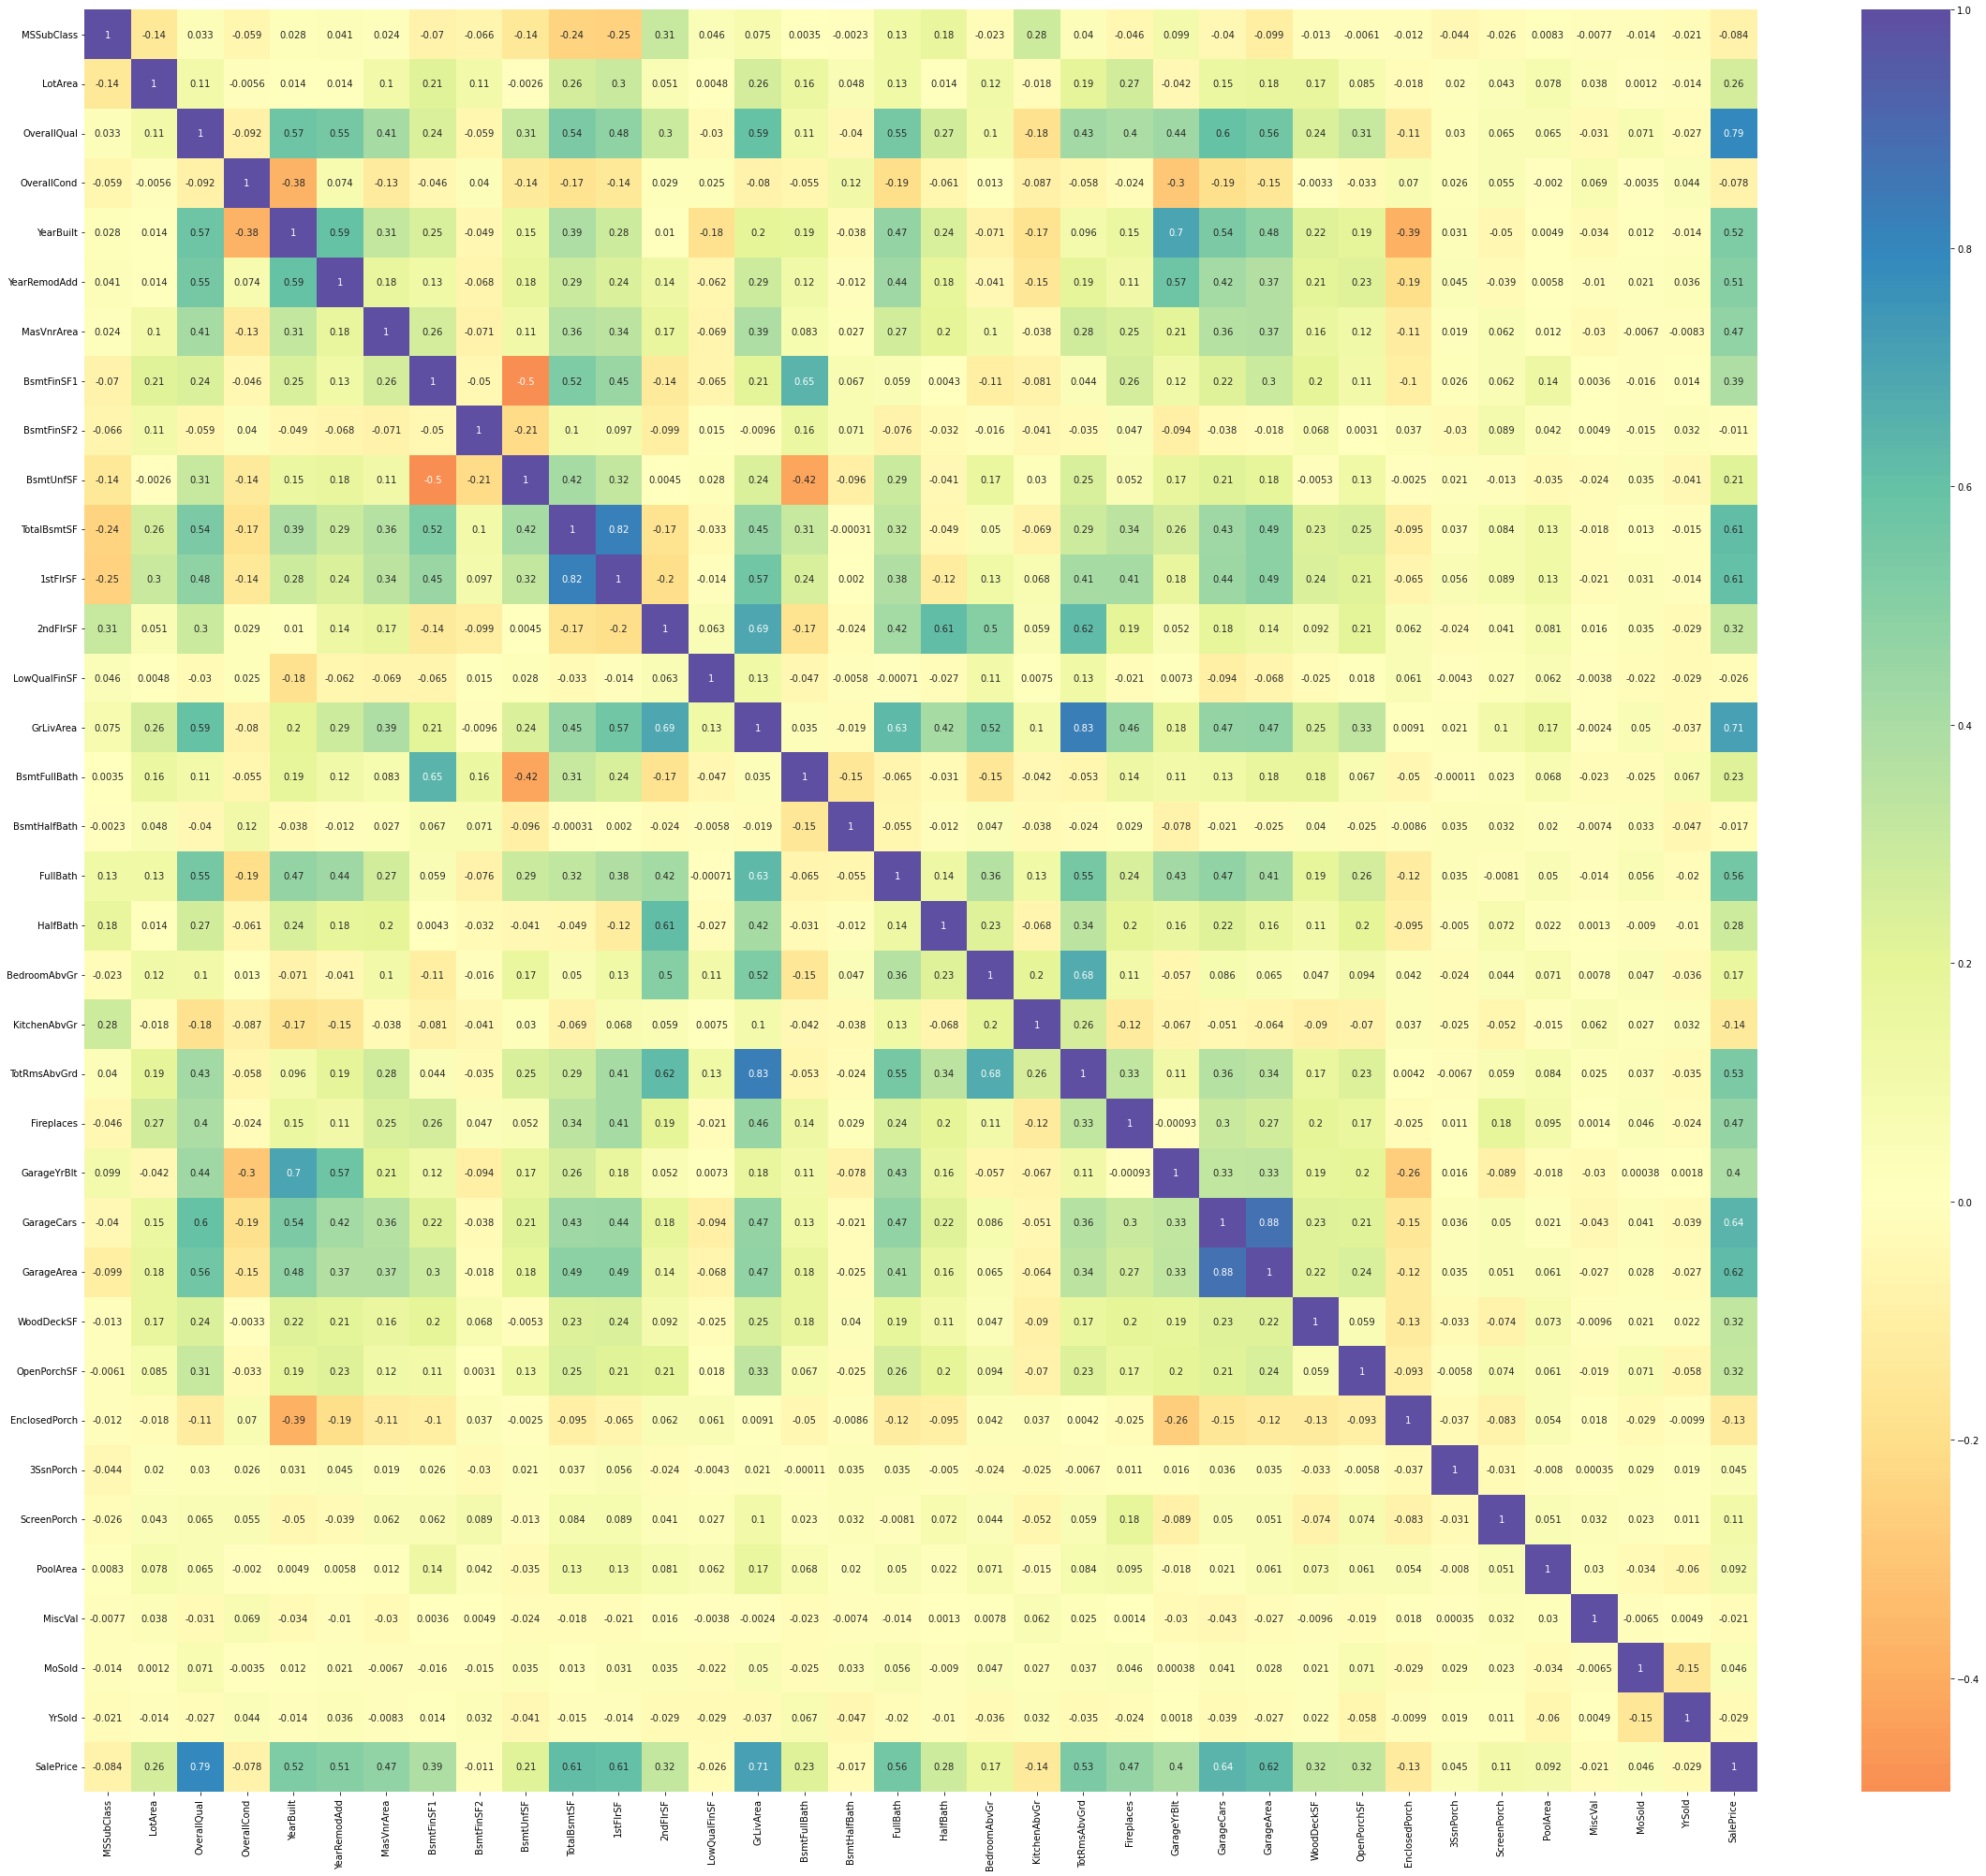

In [36]:
plt.subplots(figsize = (40,35))
sns.heatmap(df_num.corr(),annot=True, center = 0,cmap = 'Spectral')

##### Here we can see many variables are highly correlatd, so lets remove them and derive new columns while eliminating few columns

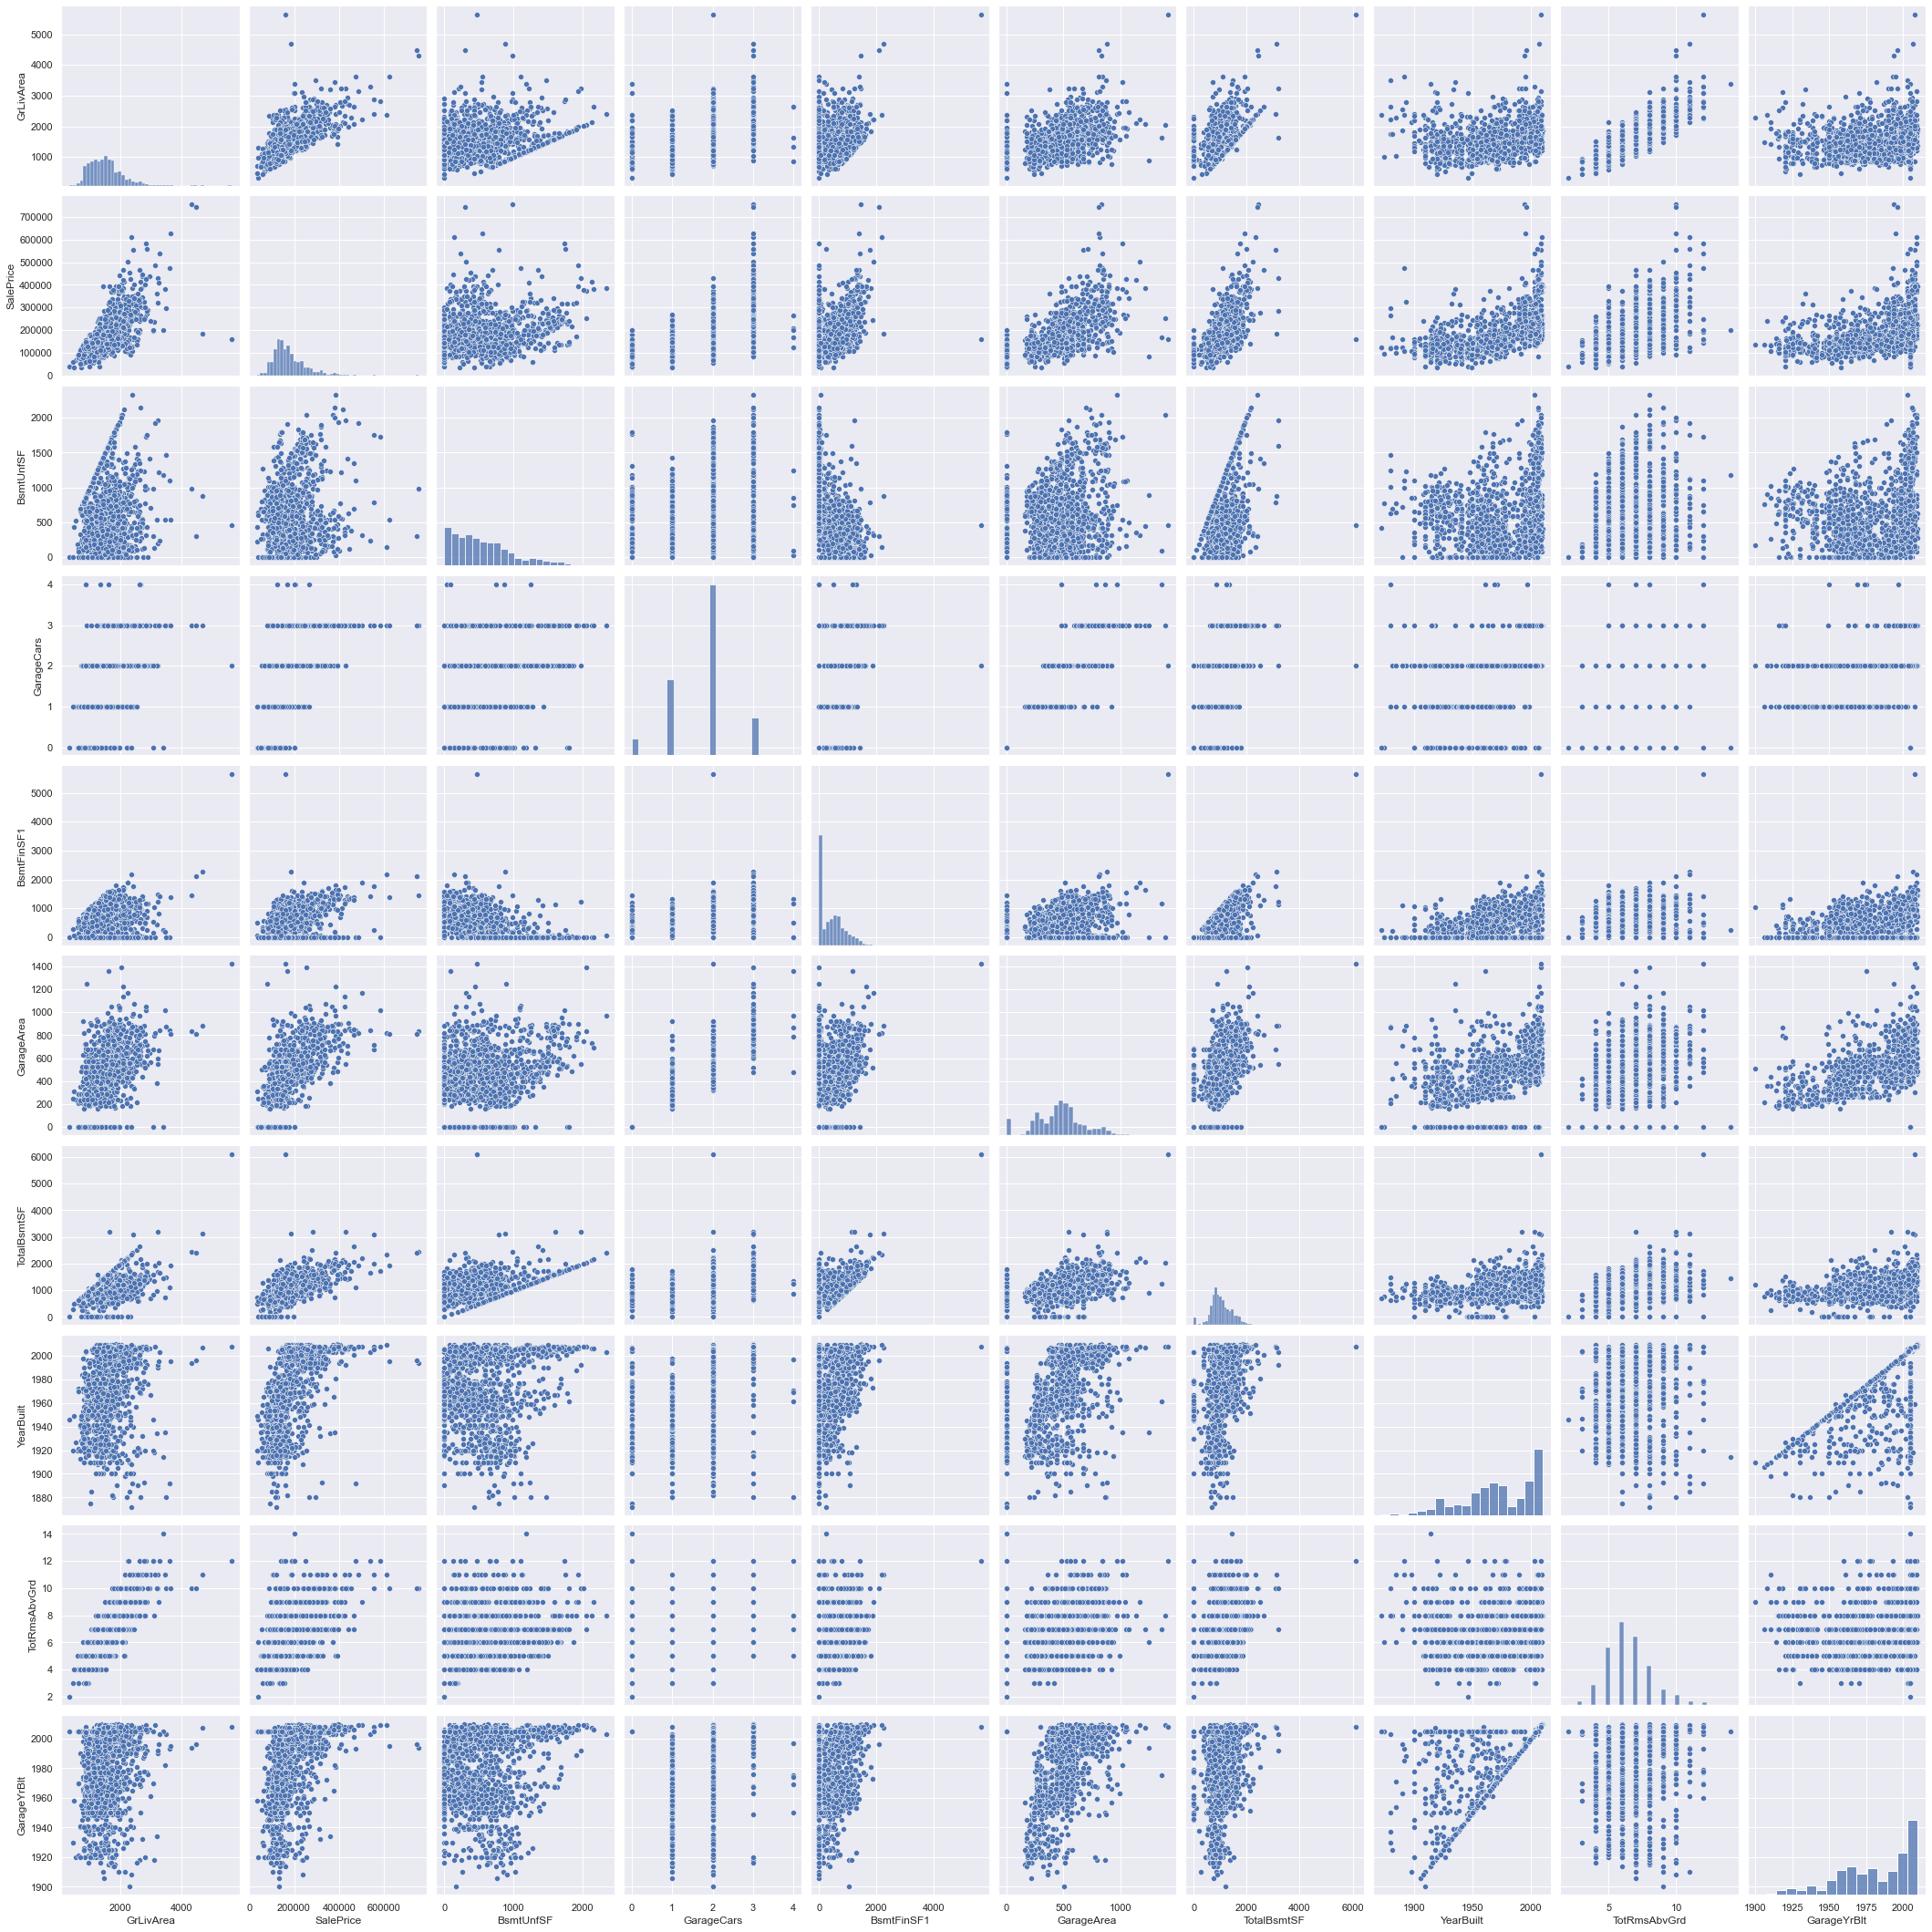

In [37]:
sns.set()
cols = [ 'GrLivArea','SalePrice', 'BsmtUnfSF','GarageCars',  'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 3)
plt.show()


Here we can derive new columns as age of the property while eliminating few columns

In [38]:
# Creating a new Column to determine the age of the property

df['property_age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

In [39]:
df.drop(['GarageCars'], axis = 1,inplace = True)
df.drop(['BsmtUnfSF'], axis = 1,inplace = True)
df.drop(['TotRmsAbvGrd'], axis = 1,inplace = True)
df.drop(['YrSold'], axis = 1,inplace = True)
df.drop(['YearBuilt'], axis = 1,inplace = True)
df.drop(['GarageYrBlt'], axis = 1,inplace = True)
df.drop(['YearRemodAdd'], axis = 1,inplace = True)
df.drop(['MoSold'], axis = 1,inplace = True)

In [40]:
df.head()

MSSubClass MSZoning  LotArea Street            Alley LotShape LandContour  \
0          60       RL     8450   Pave  No_alley_access      Reg         Lvl   
1          20       RL     9600   Pave  No_alley_access      Reg         Lvl   
2          60       RL    11250   Pave  No_alley_access      IR1         Lvl   
3          70       RL     9550   Pave  No_alley_access      IR1         Lvl   
4          60       RL    14260   Pave  No_alley_access      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
0             3             1          Gd        Typ           0   
1             3             1          TA        Typ           1   
2             3             1          Gd        Typ           1   
3             3             1          Gd        Typ           1   
4             4             1          Gd        Typ           1   

    FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond  \
0  No_Fireplace     Attchd          RFn         548         TA         TA   
1            TA     Attchd          RFn         460         TA         TA   
2            TA     Attchd          RFn         608         TA         TA   
3        

In [41]:
df.shape

(1460, 74)

##### In our data we can see many outliers in above plots which must be handled. 
So, Let's write a function and loop all the columns to remove all the outliers.

In [42]:
def outliers_dropping(data):
    list = []
    outl_col = [ 'GrLivArea','SalePrice',  'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF']
    for col in outl_col:
        Q1 = data[col].quantile(.25)
        Q3 = data[col].quantile(.99)
        IQR = Q3-Q1
        data =  data[(data[col] >= (Q1-(1.5*IQR))) & (data[col] <= (Q3+(1.5*IQR)))] 
    return data  
df = outliers_dropping(df)

In [43]:
df.shape

(1459, 74)



##### Here we can see we successfully removed 5 outliers from our data

###### Let's Plot few categorical features with target variable

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

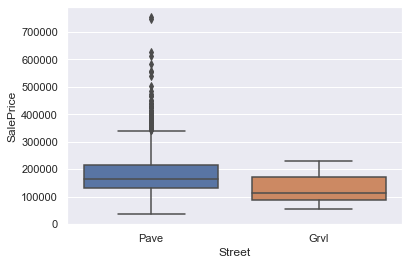

In [44]:
sns.boxplot(x='Street',y='SalePrice',data = df)

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

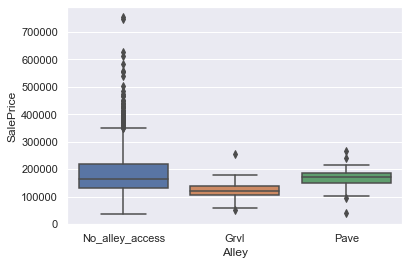

In [45]:
sns.boxplot(x='Alley',y='SalePrice',data = df)

- Here we can say that paved alley or street has higher selling price compared to gravel

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

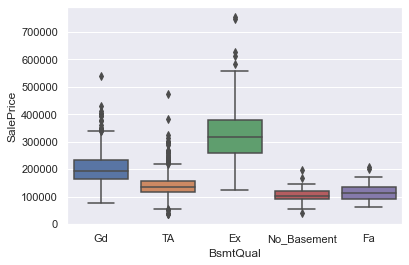

In [46]:
sns.boxplot(x='BsmtQual',y='SalePrice',data = df)

- Quality basement is more expensive compared to others

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

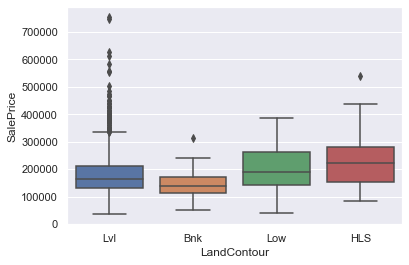

In [47]:
sns.boxplot(x='LandContour',y='SalePrice',data = df)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

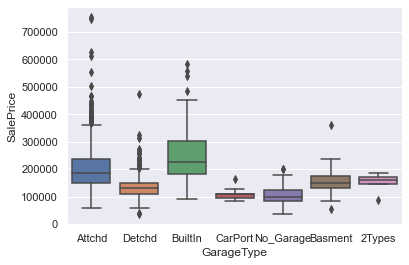

In [48]:
sns.boxplot(x='GarageType',y='SalePrice',data = df)

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

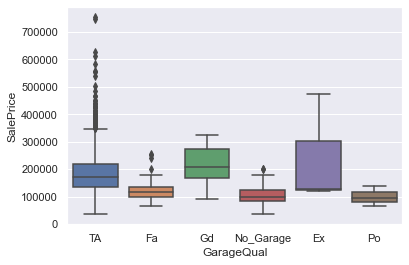

In [49]:
sns.boxplot(x='GarageQual',y='SalePrice',data = df)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

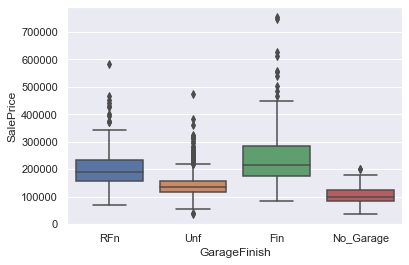

In [50]:
sns.boxplot(x='GarageFinish',y='SalePrice',data = df)

- Here we can observe Builtin finished and excellent quality garages are very expensive

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

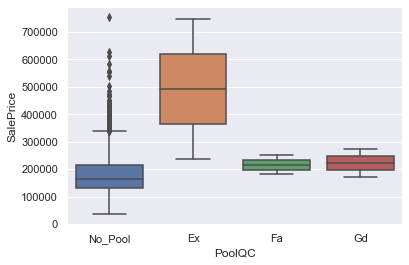

In [51]:
sns.boxplot(x='PoolQC',y='SalePrice',data = df)

- Here we can see High quality pools are very expensive

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

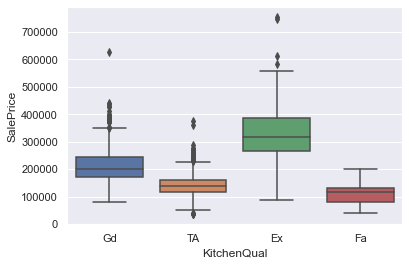

In [52]:
sns.boxplot(x='KitchenQual',y='SalePrice',data = df)

- For High kitchen quality price is very high

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

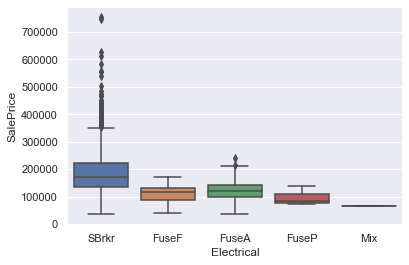

In [53]:
sns.boxplot(x='Electrical',y='SalePrice',data = df)

- Standard Circuit Breakers are very expensive

###### Let's Plot all the numerical features with target variable
###### Here we can see 36 numerical variables, Plotting them with loops

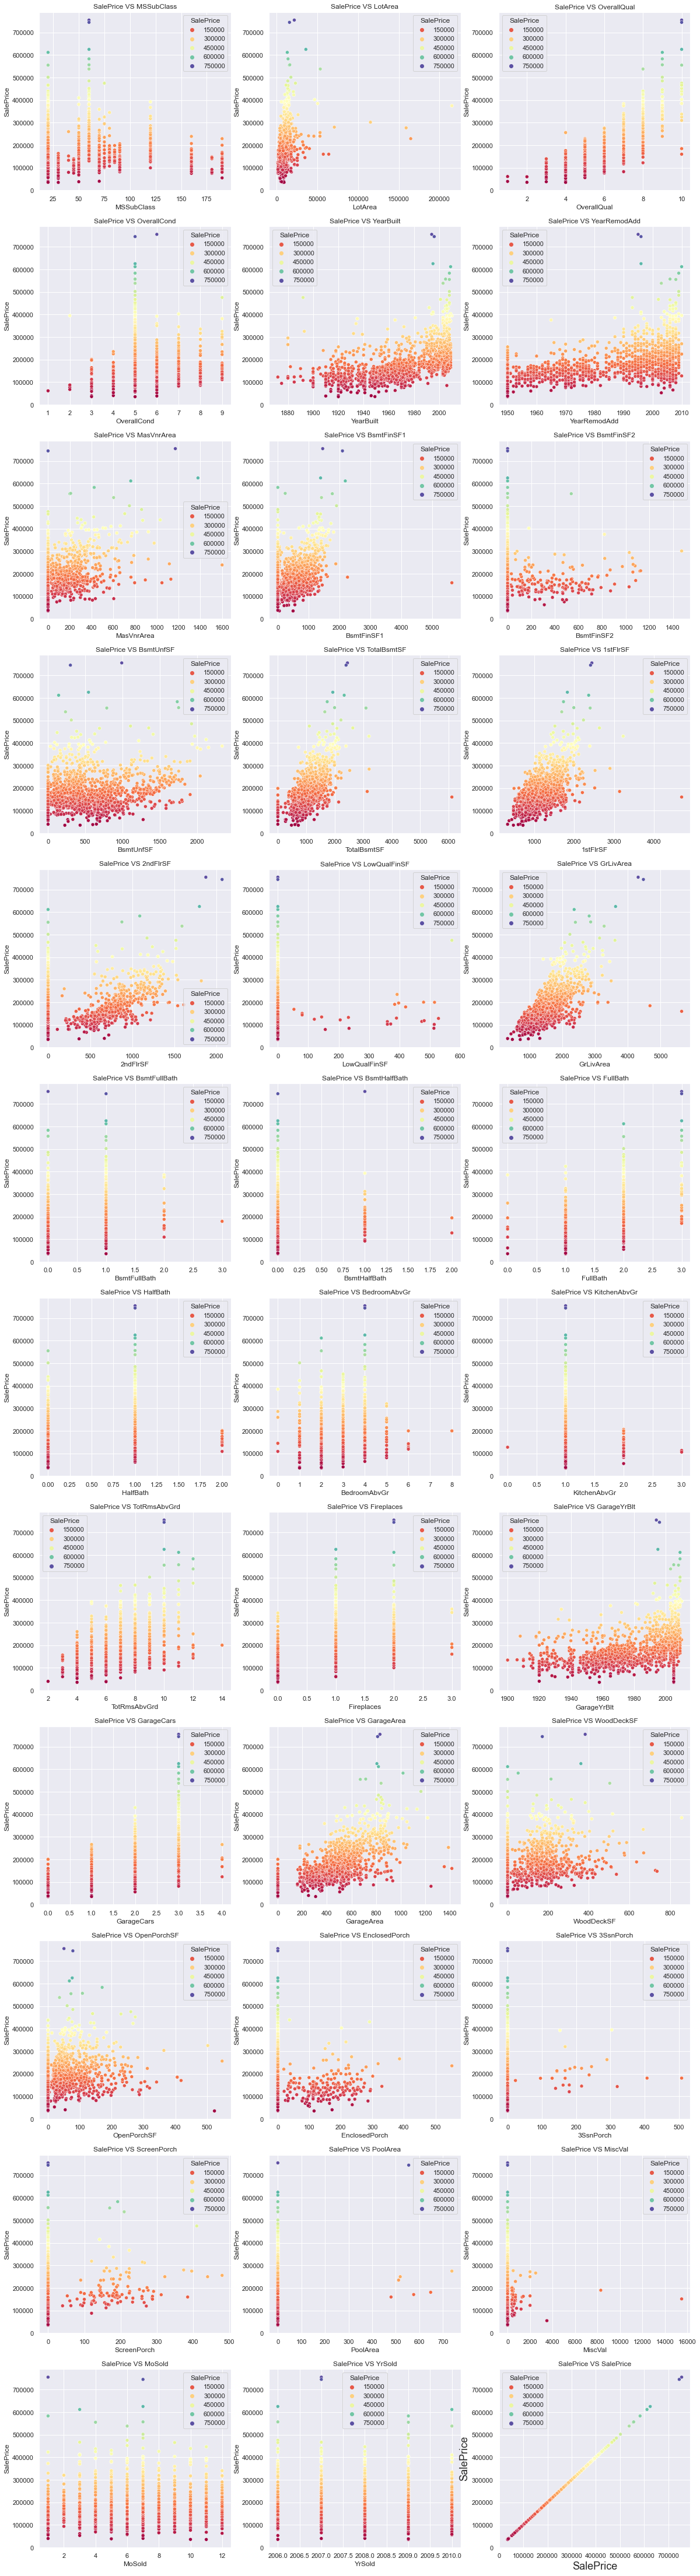

In [54]:
figure,axis= plt.subplots(12,3,figsize=(20,80))
for col,axs in zip(df_num.columns,axis.flatten()):
    sns.scatterplot(x=col, y='SalePrice', hue='SalePrice',data=df_num,ax=axs,palette='Spectral')
    plt.xlabel(col,fontsize=18)
    plt.ylabel('SalePrice',fontsize=18)
    axs.set_title('SalePrice'+' VS '+str(col))

## Insights:
- By observing plot for YearBuilt we can conclude that properties are becoming costlier
- Remodelling cost also increased 
- Here, with basement area price also increased
- GRLiving (Above grade (ground) living area square feet) increased linearly with price
- Month sold dont have much significance on sales price 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

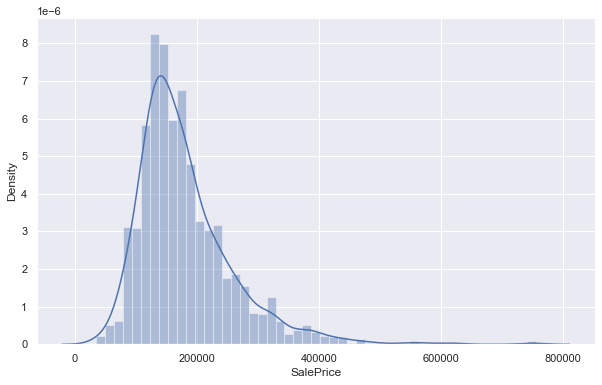

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(df["SalePrice"])

### As we can see the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

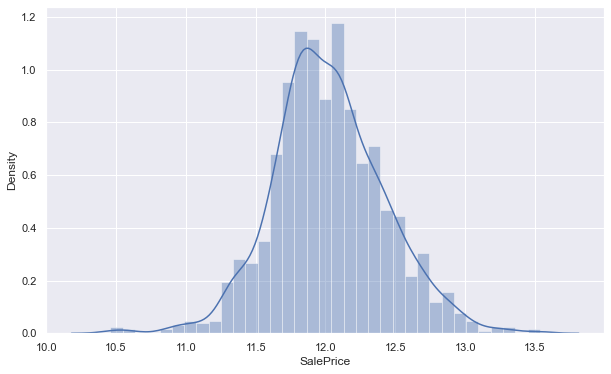

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(np.log(df["SalePrice"]))

###### We can observe a centralized figure after the log transformation

In [57]:
null_df = df.isnull().sum()/len(df)*100
null_df[null_df>0].sort_values(ascending=False)

Series([], dtype: float64)

# Let's create dummy variables

In [58]:
df_cat.head()

MSZoning Street            Alley LotShape LandContour Utilities LotConfig  \
0       RL   Pave  No_alley_access      Reg         Lvl    AllPub    Inside   
1       RL   Pave  No_alley_access      Reg         Lvl    AllPub       FR2   
2       RL   Pave  No_alley_access      IR1         Lvl    AllPub    Inside   
3       RL   Pave  No_alley_access      IR1         Lvl    AllPub    Corner   
4       RL   Pave  No_alley_access      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional   FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ  No_Fireplace     Attchd   
1          Y      SBrkr          TA        Typ            TA     Attchd   
2          Y      SBrkr          Gd        Typ            TA     Attchd   
3          Y      SBrkr          Gd        Typ            Gd     Detchd   
4          Y      SBrkr          Gd        Typ            TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive   PoolQC     Fence  \
0          RFn         TA         TA          Y  No_Pool  No_Fence   
1          RFn         TA         TA          Y  No_Pool  No_Fence   
2          RFn         TA         TA          Y  No_Pool  No_Fence   
3          Unf         TA         TA          Y  No_Pool  No_Fence   
4          RFn         TA         TA          Y  No_Pool  No_Fence   

  MiscFeature SaleType SaleCondition  
0        None       WD        Normal  
1        None       WD        Normal  
2        None       WD        Normal  
3        None       WD       Abnorml  
4        None       WD        Normal

In [59]:
cat_cols = df_cat.columns

In [60]:
df_dummies = pd.get_dummies(df[df_cat.columns], drop_first=True)

In [61]:
df_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No_alley_access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0

In [62]:
# Dropping the categorical columns for which dummies are created
df = df.drop(list(df_cat.columns), axis=1)

In [63]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'property_age',
       'garage_age', 'remodel_age'],
      dtype='object')

In [64]:
# concatinating the newly created dummy features to the original dataset
df = pd.concat([df,df_dummies], axis=1)

In [65]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [66]:
df.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           0          856       856       854             0       1710   
1           0         1262      1262         0             0       1262   
2           0          920       920       866             0       1786   
3           0          756       961       756             0       1717   
4           0         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0         548           0           61              0          0   
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  property_age  garage_age  \
0            0         0        0     208500             5         5.0   
1            0         0        0     181500            31        31.0   
2            0         0        0     223500             7         7.0   
3            0         0        0     140000            91         8.0   
4            0         0        0     250000             8         8.0   

   remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0            5            0            0            1            0   
1           31            0            0            1            0   
2            6            0            0            1            0   
3           36            0            0            1            0   
4            8            0            0            1            0   

   Street_Pave  Alley_No_alley_access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0            1                      1           0             0             0   
1            1                      1           0             0             0   
2            1                      1           0             0             0   
3            1                      1           0             0             0   
4            1                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0            

In [67]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [68]:
df.shape

(1459, 253)

In [69]:
null_df = df.isnull().sum()/len(df)*100
null_df[null_df>0].sort_values(ascending=False)

Series([], dtype: float64)

# Let's split the data set into train and test sets

In [70]:
# split ratio is 70:30 for train and test sets
df_train,df_test = train_test_split(df,test_size = 0.3, random_state=100)

In [71]:
# To centralize target variable using log transformation.
y_train = np.log(df_train['SalePrice'])
x_train = df_train.drop("SalePrice",axis = 1)

y_test= np.log(df_test['SalePrice'])
x_test = df_test.drop("SalePrice",axis = 1)

In [72]:
df_train.shape  # Size of training data

(1021, 253)

In [73]:
df_test.shape    # Size of testing data

(438, 253)

In [74]:
# Instantiating the object

scaler = StandardScaler()

In [75]:
num_cols=x_train.select_dtypes(include=['int64','float64']).columns

In [76]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'property_age', 'garage_age',
       'remodel_age'],
      dtype='object')

In [77]:
# Scaling the data using standard scaler

x_train[num_cols]= scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [78]:
x_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
984     0.766073 -0.042320    -0.789413    -0.513945   -0.556577   -0.984488   
1416    3.130523  0.075318    -1.503944     0.393906   -0.556577   -0.984488   
390    -0.179708 -0.208853    -0.789413     2.209607   -0.556577   -0.439492   
877     0.056738 -0.167317     2.068711    -0.513945    0.595626    1.661342   
567    -0.889043 -0.037867     0.639649    -0.513945    0.339581   -0.979965   

      BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
984    -0.299624    -2.402963  0.348208  0.197513     -0.124713   0.413618   
1416   -0.299624    -0.629470  0.202605  1.596075     -0.124713   1.486071   
390     1.981805    -0.437741 -0.538408  0.138097     -0.124713  -0.294279   
877    -0.299624     0.934034  0.764215  0.951640     -0.124713   1.358765   
567    -0.299624     1.059571  0.954019 -0.789708     -0.124713   0.029772   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
984      -0.828295     -0.239194  0.789648 -0.760878      1.382309   
1416     -0.828295     -0.239194  0.789648 -0.760878      1.382309   
390       1.093726     -0.239194 -1.022106 -0.760878      1.382309   
877       1.093726     -0.239194  0.789648  1.251704      1.382309   
567      -0.828295     -0.239194  0.789648 -0.760878      0.170860   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
984       4.361884   -0.955258    0.319265   -0.733321    -0.704756   
1416      4.361884   -0.955258    0.417412   -0.733321    -0.704756   
390      -0.210481   -0.955258   -0.405153   -0.733321     1.160494   
877      -0.210481    0.600274    1.249325    0.707731    -0.704756   
567      -0.210481   -0.955258    0.286549   -0.733321    -0.704756   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  property_age  \
984       -0.367062  -0.125186       -0.273 -0.044266 -0.077724     -0.150898   
1416       1.423315  -0.125186       -0.273 -0.044266 -0.077724      2.902197   
390        1.391905  -0.125186       -0.273 -0.044266 -0.077724      2.344104   
877       -0.367062  -0.125186       -0.273 -0.044266 -0.077724     -1.037280   
567       -0.367062  -0.125186       -0.273 -0.044266 -0.077724     -1.004451   

      garage_age  remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
984     0.167638     0.411598            0            0            1   
1416    0.450010     1.753150            0            0            0   
390     0.086960     1.657325            0            0            1   
877    -0.921514    -0.929955            0            0            1   
567    -0.881175    -0.834129            0            0            1   

      MSZoning_RM  Street_Pave  Alley_No_alley_access  Alley_Pave  \
984             0            1                      1           0   
1416            1            1                      1           0   
390             0            1                      0           0   
877             0            1                      1           0   
567             0            1                      1           0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
984              0             0             1                0   
1416             0             0             1                0   
390              0             0             1                0   
877              0             0             1                0   
567              0             0             0                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
984                 0                1                 0                  0   
1416                0                1                 0                  0   
390                 0                1                 0                  0   
877                 0                1                 0                  0   
567                 0                1                 0                  0

In [79]:
x_test.head()

MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
789    0.056738  0.159068    -0.074882     2.209607    0.280904    0.299983   
425    0.056738 -0.695574     0.639649     2.209607   -0.556577   -0.984488   
204   -0.179708 -0.683762    -0.789413     1.301757   -0.556577   -0.278933   
118    0.056738  0.175625     0.639649    -0.513945   -0.556577    2.339760   
244    0.056738 -0.162863     0.639649    -0.513945   -0.556577    0.587180   

     BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
789   -0.299624    -0.503933 -0.499408  1.749186     -0.124713   1.094510   
425   -0.299624    -0.917064 -1.198821  0.768821     -0.124713  -0.251844   
204   -0.299624    -0.759572 -1.165020  0.499163     -0.124713  -0.454375   
118   -0.299624     1.415639  1.380427  2.690702     -0.124713   3.283781   
244   -0.299624    -0.239165  0.140204  1.239579     -0.124713   1.138874   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
789     -0.828295     -0.239194  0.789648  1.251704      2.593757   
425     -0.828295     -0.239194 -1.022106  1.251704      0.170860   
204     -0.828295     -0.239194 -1.022106  1.251704     -1.040588   
118      1.093726     -0.239194  2.601402 -0.760878      2.593757   
244      1.093726     -0.239194  0.789648  1.251704      0.170860   

     KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
789     -0.210481   -0.955258   -0.124733    0.308309     1.705721   
425     -0.210481    2.155805   -1.078162   -0.733321    -0.704756   
204     -0.210481   -0.955258   -1.078162   -0.733321    -0.202574   
118     -0.210481    2.155805    0.576317    2.140952    -0.704756   
244     -0.210481    2.155805   -0.035934   -0.733321     1.160494   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  property_age  \
789      -0.367062  -0.125186       -0.273 -0.044266 -0.077724      0.144563   
425       1.611776  -0.125186       -0.273 -0.044266 -0.077724      0.866801   
204      -0.367062  -0.125186       -0.273 -0.044266 -0.077724      0.833972   
118      -0.367062  -0.125186       -0.273 -0.044266 -0.077724     -0.544845   
244      -0.367062  -0.125186       -0.273 -0.044266 -0.077724     -0.676161   

     garage_age  remodel_age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
789    0.530688    -1.121605            0            0            1   
425    1.377806    -0.307091            0            0            0   
204    1.337467     1.705237            0            0            0   
118   -0.316430    -0.163353            0            0            1   
244   -0.477785    -0.738304            0            0            1   

     MSZoning_RM  Street_Pave  Alley_No_alley_access  Alley_Pave  \
789            0            1                      1           0   
425            1            1                      0           0   
204            1            1                      0           0   
118            0            1                      1           0   
244            0            1                      1           0   

     LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
789             0             0             0                0   
425             0             0             1                1   
204             0             0             1                0   
118             0             0             1                0   
244             0             0             0                0   

     LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
789                1                0                 0                  0   
425                0                0                 0                  0   
204                0                1                 0                  0   
118                0                1                 0                  0   
244                0                1                 0                  0   

     LotConfig_FR2  LotConfig_FR3  LotConfig_Ins

In [80]:
x_train.describe()

MSSubClass       LotArea   OverallQual   OverallCond    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -8.210458e-17 -9.419498e-18  2.701071e-16 -7.274625e-16 -1.211350e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.890427e-01 -8.796318e-01 -3.647537e+00 -4.145348e+00 -5.565774e-01   
25%   -8.890427e-01 -2.877626e-01 -7.894133e-01 -5.139449e-01 -5.565774e-01   
50%   -1.797075e-01 -9.760544e-02 -7.488229e-02 -5.139449e-01 -5.565774e-01   
75%    2.931826e-01  1.004911e-01  6.396487e-01  3.939059e-01  2.862378e-01   
max    3.130523e+00  1.981768e+01  2.783242e+00  3.117458e+00  7.978260e+00   

         BsmtFinSF1    BsmtFinSF2   TotalBsmtSF      1stFlrSF      2ndFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   3.479641e-17 -6.198111e-17 -2.173688e-16 -1.563936e-16 -2.877228e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -9.844880e-01 -2.996236e-01 -2.402963e+00 -2.069836e+00 -7.897081e-01   
25%   -9.844880e-01 -2.996236e-01 -6.043629e-01 -7.386121e-01 -7.897081e-01   
50%   -1.613408e-01 -2.996236e-01 -1.159106e-01 -2.082024e-01 -7.897081e-01   
75%    6.256241e-01 -2.996236e-01  5.734007e-01  6.628135e-01  8.739417e-01   
max    4.126261e+00  8.300955e+00  4.914692e+00  5.355899e+00  3.929298e+00   

       LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.115785e-16  5.382570e-17 -1.146107e-16  1.021057e-16  4.340852e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.247128e-01 -2.086202e+00 -8.282948e-01 -2.391940e-01 -2.833860e+00   
25%   -1.247128e-01 -7.552794e-01 -8.282948e-01 -2.391940e-01 -1.022106e+00   
50%   -1.247128e-01 -8.788935e-02 -8.282948e-01 -2.391940e-01  7.896478e-01   
75%   -1.247128e-01  5.004169e-01  1.093726e+00 -2.391940e-01  7.896478e-01   
max    1.072682e+01  6.088362e+00  4.937767e+00  8.039351e+00  2.601402e+00   

           HalfBath  BedroomAbvGr  KitchenAbvGr    Fireplaces    GarageArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -9.221049e-17  1.793646e-16 -2.102464e-16 -2.990317e-17  6.030925e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -7.608781e-01 -3.463484e+00 -4.782846e+00 -9.552579e-01 -2.199842e+00   
25%   -7.608781e-01 -1.040588e+00 -2.104811e-01 -9.552579e-01 -6.855735e-01   
50%   -7.608781e-01  1.708605e-01 -2.104811e-01  6.002737e-01  2.949766e-02   
75%    1.251704e+00  1.708605e-01 -2.104811e-01  6.002737e-01  4.921908e-01   
max    3.264285e+00  6.228101e+00  8.934249e+00  3.711337e+00  4.296556e+00   

         WoodDeckSF   OpenPorchSF  EnclosedPorch     3SsnPorch   ScreenPorch  \
count  1.021000e+03  1.021000e+03   1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.174776e-17 -7.307247e-17   4.844313e-17  3.264338e-16 -4.174482e-16   
std    1.000490e+00  1.000490e+00   1.000490e+00  1.000490e+00  1.000490e+00   
min   -7.333209e-01 -7.047564e-01  -3.670616e-01 -1.251862e-01 -2.730003e-01   
25%   -7.333209e-01 -7.047564e-01  -3.670616e-01 -1.251862e-01 -2.730003e-01   
50%   -7.333209e-01 -3.460543e-01  -3.670616e-01 -1.251862e-01 -2.730003e-01   
75%    5.824225e-01  3.283054e-01  -3.670616e-01 -1.251862e-01 -2.730003e-01   
max    5.978537e+00  7.143644e+00   8.302132e+00  1.549427e+01  8.651226e+00   

           PoolArea       MiscVal  property_age    garage_age   remodel_age  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -2.900063e-16 -8.615374e-16  5.784904e-17 -1.489721e-17  9.829986e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -4.426646e-02 -7.772364e-02 -1.201425e+00 -1.123209e+00 -1.169518e+00   
25%   -4.426646e-02 -7.772364e-02 -9.716217e-

In [81]:
x_test.describe()

MSSubClass     LotArea  OverallQual  OverallCond  MasVnrArea  \
count  438.000000  438.000000   438.000000   438.000000  438.000000   
mean    -0.055547   -0.026398    -0.019416     0.029107   -0.030165   
std      1.000644    0.848566     0.951770     1.034361    0.857185   
min     -0.889043   -0.896769    -3.647537    -3.237497   -0.556577   
25%     -0.889043   -0.296477    -0.789413    -0.513945   -0.556577   
50%     -0.179708   -0.127523    -0.074882    -0.513945   -0.556577   
75%      0.056738    0.101653     0.639649     0.393906    0.348916   
max      3.130523   14.371963     2.783242     3.117458    4.644339   

       BsmtFinSF1  BsmtFinSF2  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count  438.000000  438.000000   438.000000  438.000000  438.000000   
mean     0.035628   -0.092699     0.009001   -0.068150    0.007682   
std      0.947516    0.784524     0.840614    0.916872    0.990801   
min     -0.984488   -0.299624    -2.402963   -2.168638   -0.789708   
25%     -0.984488   -0.299624    -0.545018   -0.789313   -0.789708   
50%     -0.042618   -0.299624    -0.167267   -0.235503   -0.789708   
75%      0.618840   -0.299624     0.492943    0.486660    0.869371   
max      3.321205    6.276260     2.655029    3.502065    2.841527   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    438.000000  438.000000    438.000000    438.000000  438.000000   
mean      -0.004926   -0.044525     -0.042812     -0.002934    0.003727   
std        1.080773    0.973216      0.981021      0.961372    0.994153   
min       -0.124713   -2.286805     -0.828295     -0.239194   -2.833860   
25%       -0.124713   -0.750939     -0.828295     -0.239194   -1.022106   
50%       -0.124713   -0.188191     -0.828295     -0.239194    0.789648   
75%       -0.124713    0.474377      1.093726     -0.239194    0.789648   
max       11.927869    4.028326      3.015746      3.900078    2.601402   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  438.000000    438.000000    438.000000  438.000000  438.000000   
mean     0.029451      0.029801      0.008742   -0.014126    0.025592   
std      1.038951      0.961123      1.025756    0.994632    0.975793   
min     -0.760878     -3.463484     -0.210481   -0.955258   -2.199842   
25%     -0.760878     -1.040588     -0.210481   -0.955258   -0.627153   
50%     -0.760878      0.170860     -0.210481    0.600274    0.043519   
75%      1.251704      0.170860     -0.210481    0.600274    0.495696   
max      3.264285      3.805205      8.934249    3.711337    3.249655   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  438.000000   438.000000     438.000000  438.000000   438.000000   
mean     0.013794    -0.125526      -0.073398   -0.067553     0.024007   
std      0.937336     0.800903       0.857739    0.610941     1.118441   
min     -0.733321    -0.704756      -0.367062   -0.125186    -0.273000   
25%     -0.733321    -0.704756      -0.367062   -0.125186    -0.273000   
50%     -0.733321    -0.374751      -0.367062   -0.125186    -0.273000   
75%      0.650951     0.156128      -0.367062   -0.125186    -0.273000   
max      3.856117     3.771845       4.627148    7.407820     7.907540   

         PoolArea     MiscVal  property_age  garage_age  remodel_age  \
count  438.000000  438.000000    438.000000  438.000000   438.000000   
mean     0.195666    0.022610     -0.002568    0.001953    -0.070810   
std      2.524002    0.873093      0.976191    0.998758     0.960524   
min     -0.044266   -0.077724     -1.201425   -1.123209    -1.121605   
25%     -0.044266   -0.077724     -0.938793   -0.921514    -0.929955   
50%     -0.044266   -0.077724     -0.052411   -0.114735    -0.498741   
75%     -0.044266   -0.077724      0.571340    0.692044     0.746986   
max     31.215989   16.040461      2.967855    2.910687     1.753150   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
count   438.

# MODEL BUILDING 

- We Use RFE from SKlearn to build and eliminate few columns

# 1) Linear Regression

In [82]:
# As there are many features of about 258 lets take atleast half of them and try to build a model

lm = LinearRegression()

lm.fit(x_train, y_train)
 # running RFE for top 125 variables
rfe = RFE(lm, 125)            
rfe = rfe.fit(x_train, y_train)

In [83]:
# Slected columns by RFE for 150 variables

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 73),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 85),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 26),
 ('BsmtHalfBath', False, 118),
 ('FullBath', False, 105),
 ('HalfBath', False, 104),
 ('BedroomAbvGr', False, 66),
 ('KitchenAbvGr', False, 34),
 ('Fireplaces', False, 99),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 125),
 ('EnclosedPorch', False, 122),
 ('3SsnPorch', False, 81),
 ('ScreenPorch', False, 45),
 ('PoolArea', False, 113),
 ('MiscVal', False, 57),
 ('property_age', True, 1),
 ('garage_age', False, 78),
 ('remodel_age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('Alley_No_alley_access', False, 23),
 ('

In [84]:
len(rfe.support_[rfe.support_ == True ]) # Selected true counts for confirmation

125

In [85]:
rfe_col = x_train.columns[rfe.support_] # removing unwanted columns choosen by RFE
x_train_rfe = x_train[rfe_col]

In [86]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, var) for var in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
124     SaleCondition_Partial       inf
79   BsmtFinType1_No_Basement       inf
113      GarageCond_No_Garage       inf
114             GarageCond_Po       inf
115             GarageCond_TA       inf
110             GarageQual_TA       inf
109             GarageQual_Po       inf
108      GarageQual_No_Garage       inf
107             GarageQual_Gd       inf
106             GarageQual_Fa       inf
105    GarageFinish_No_Garage       inf
104      GarageType_No_Garage       inf
78   BsmtExposure_No_Basement       inf
111             GarageCond_Fa       inf
75       BsmtCond_No_Basement       inf
54         Exterior1st_CBlock       inf
9                   GrLivArea       inf
8                LowQualFinSF       inf
7                    2ndFlrSF       inf
6                    1stFlrSF       inf
73       BsmtQual_No_Basement       inf
123              SaleType_New       inf
60         Exterior2nd_CBlock       inf
112             GarageCond_Gd       inf
68               ExterCond_TA  2940.016
66               ExterCond_Gd   349.761
65               ExterCond_Fa    71.194
117          MiscFeature_None    37.640
83   BsmtFinType2_No_Basement    37.060
119          MiscFeature_Shed    35.862
15                MSZoning_RL    30.778
16                MSZoning_RM    23.240
13                MSZoning_FV    12.153
85               Heating_GasA    10.099
74                BsmtQual_TA     9.730
5                 TotalBsmtSF     9.586
96             KitchenQual_TA     9.451
86               Heating_GasW     7.022
95             KitchenQual_Gd     6.885
11               property_age     6.552
72                BsmtQual_Gd     6.444
101            Functional_Typ     6.283
29       Neighborhood_Somerst     4.739
39            Condition2_PosA     4.392
2                 OverallQual     4.376
43          HouseStyle_1Story     4.257
99            Functional_Min2     3.554
33            Condition1_Norm     3.315
87               Heating_Grav     3.280
118          MiscFeature_Othr     3.261
4                  BsmtFinSF1     3.140
12                remodel_age     3.121
98            Functional_Min1     3.089
69           Foundation_PConc     3.038
14                MSZoning_RH     3.019
10                 GarageArea     2.978
88               Heating_Wall     2.770
20              LandSlope_Sev     2.759
94             KitchenQual_Fa     2.708
63         Exterior2nd_Stucco     2.689
80           BsmtFinType1_Unf     2.633
53        Exterior1st_BrkFace     2.445
52        Exterior1st_BrkComm     2.390
59        Exterior2nd_BrkFace     2.385
56         Exterior1st_Stucco     2.385
32           Condition1_Feedr     2.379
64               ExterQual_Fa     2.368
71                BsmtQual_Fa     2.317
1                     LotArea     2.315
51        Exterior1st_AsphShn     2.139
58        Exterior2nd_Brk Cmn     2.096
57        Exterior2nd_AsphShn     2.091
50           RoofMatl_WdShake     2.079
3                 OverallCond     2.063
0                  MSSubClass     1.997
38            Condition2_Norm     1.949
27       Neighborhood_NridgHt     1.900
91               HeatingQC_TA     1.899
46             RoofStyle_Shed     1.819
44          HouseStyle_2.5Fin     1.704
40            Condition2_PosN     1.699
102            FireplaceQu_Gd     1.690
36            Condition1_RRAn     1.685
76                BsmtCond_Po     1.661
35            Condition1_PosN     1.625
28         Neighborhood_SWISU     1.617
103            FireplaceQu_TA     1.612
17                Street_Pave     1.598
77            BsmtExposure_Gd     1.551
97            Functional_Maj2     1.492
45          RoofStyle_Mansard     1.447
22       Neighborhood_ClearCr     1.445
49           RoofMatl_Tar&Grv     1.433
92           Electrical_FuseP     1.425
24       Neighborhood_Edwards     1.391
47           RoofMatl_Membran     1.387
89               HeatingQC_Gd     1.385
26       Neighborhood_NoRidge     1.385
100            Functional_Sev     1.327
23       Neighborhood

In [87]:
y_train_pred = lm.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lm.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9420519690884386
-3.0821282749261204e+22


### - In Linear regression we can see very low value of R2. So lets go for the other methods

# Ridge Regression

In [88]:
# List the alphas for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.025558      0.005897         0.009695        0.002834      0.0001   
1       0.011203      0.006071         0.007483        0.004548       0.001   
2       0.017662      0.004015         0.004969        0.002135        0.01   
3       0.014626      0.006451         0.005387        0.001743        0.05   
4       0.013199      0.003156         0.004228        0.003474         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.085465          -0.088481          -0.099425   
1   {'alpha': 0.001}          -0.085441          -0.088471          -0.099328   
2    {'alpha': 0.01}          -0.085218          -0.088379          -0.098887   
3    {'alpha': 0.05}          -0.084539          -0.088004          -0.098095   
4     {'alpha': 0.1}          -0.083972          -0.087574          -0.097493   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.084921          -0.094591        -0.090577        0.005602   
1          -0.084721          -0.094557        -0.090504        0.005612   
2          -0.084134          -0.094192        -0.090162        0.005592   
3          -0.082861          -0.092952        -0.089290        0.005595   
4          -0.081869          -0.091873        -0.088556        0.005613   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.059467           -0.054456   
1               25           -0.059471           -0.054462   
2               24           -0.059511           -0.054514   
3               23           -0.059697           -0.054748   
4               22           -0.059905           -0.055077   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.053139           -0.060888           -0.057468   
1           -0.053154           -0.060935           -0.057477   
2           -0.053224           -0.061007           -0.057546   
3           -0.053449           -0.061099           -0.057834   
4           -0.053677           -0.061230           -0.058172   

   mean_train_score  std_train_score  
0         -0.057084         0.002925  
1         -0.057100         0.002933  
2         -0.057161         0.002932  
3         -0.057365         0.002891  
4         -0.057612         0.002849

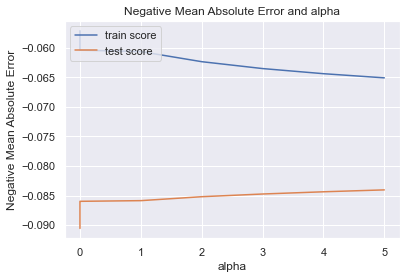

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([-1.95409619e-02,  2.09327703e-02,  5.47011518e-02,  4.52383268e-02,
       -3.21963464e-04,  2.04721423e-02,  7.18609548e-03,  4.08137235e-02,
        4.14925815e-02,  4.56332861e-02, -1.08147340e-03,  6.91999263e-02,
        1.52433459e-02, -2.13876035e-03,  1.28567382e-02,  9.04649914e-03,
        8.12453320e-03, -1.22140985e-02,  8.61228353e-03,  4.14081947e-02,
        1.18675860e-02, -8.71368477e-04,  3.63688512e-03,  4.85408958e-03,
        8.85712008e-03,  1.88312950e-03,  2.49848949e-03, -5.34108816e-02,
        1.02748136e-02, -2.35827852e-02,  1.37851715e-01,  1.43764556e-01,
        1.60716780e-01,  1.42280354e-01,  9.08458005e-02,  6.61045157e-03,
        3.32265008e-02,  1.53675001e-02,  7.19058764e-03,  6.44221370e-03,
        4.76862423e-02,  3.63467404e-02,  3.73208235e-02, -3.58295171e-02,
        2.48699607e-02, -2.83949322e-02, -6.31959931e-03, -1.44136926e-02,
        1.23662567e-04, -4.97129147e-02, -6.88662087e-03, -7.93185556e-02,
        5.52295501e-03,  

In [92]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(i, 3) for i in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.503),
 ('MSSubClass', -0.02),
 ('LotArea', 0.021),
 ('OverallQual', 0.055),
 ('OverallCond', 0.045),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', 0.046),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', -0.002),
 ('FullBath', 0.013),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', -0.012),
 ('Fireplaces', 0.009),
 ('GarageArea', 0.041),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.004),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.009),
 ('PoolArea', 0.002),
 ('MiscVal', 0.002),
 ('property_age', -0.053),
 ('garage_age', 0.01),
 ('remodel_age', -0.024),
 ('MSZoning_FV', 0.138),
 ('MSZoning_RH', 0.144),
 ('MSZoning_RL', 0.161),
 ('MSZoning_RM', 0.142),
 ('Street_Pave', 0.091),
 ('Alley_No_alley_access', 0.007),
 ('Alley_Pave', 0.033),
 ('LotShape_IR2', 0.015),
 ('LotShape_IR3', 0.007),
 ('LotShape_Reg

In [93]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(x_train, y_train)

# predicting train and test data
y_train_pred = lm.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9482290910432771
0.8884603744201733


In [94]:
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE = 0.12896746935928943


In [95]:
# Creating a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [96]:
paraRidge = pd.DataFrame(mod_ridge)
paraRidge.columns = ['Variable', 'Coef']
res=paraRidge.sort_values(by=['Coef'], ascending = False)
res.head(22)

Variable    Coef
0                constant  11.503
33            MSZoning_RL   0.161
32            MSZoning_RH   0.144
34            MSZoning_RM   0.142
31            MSZoning_FV   0.138
56   Neighborhood_Crawfor   0.130
72   Neighborhood_StoneBr   0.109
242        SaleType_ConLD   0.104
114   Exterior1st_BrkFace   0.099
84        Condition2_Norm   0.093
83       Condition2_Feedr   0.092
35            Street_Pave   0.091
202        Functional_Typ   0.089
85        Condition2_PosA   0.082
71   Neighborhood_Somerst   0.076
76        Condition1_Norm   0.075
66   Neighborhood_NridgHt   0.072
246          SaleType_Oth   0.069
12              GrLivArea   0.069
54   Neighborhood_ClearCr   0.066
181          Heating_GasW   0.057
218         GarageQual_Gd   0.057

In [97]:
# Sorting the coefficients in ascending order
paraRidge = paraRidge.sort_values((['Coef']), axis = 0, ascending = False)
paraRidge

Variable    Coef
0                constant  11.503
33            MSZoning_RL   0.161
32            MSZoning_RH   0.144
34            MSZoning_RM   0.142
31            MSZoning_FV   0.138
..                    ...     ...
113   Exterior1st_BrkComm  -0.080
59    Neighborhood_IDOTRR  -0.083
217         GarageQual_Fa  -0.084
60   Neighborhood_MeadowV  -0.135
86        Condition2_PosN  -0.329

[253 rows x 2 columns]

In [98]:
paraRidge_asc = paraRidge.sort_values(by=['Coef'], ascending=False)
paraRidge_asc.head(12)

Variable    Coef
0                constant  11.503
33            MSZoning_RL   0.161
32            MSZoning_RH   0.144
34            MSZoning_RM   0.142
31            MSZoning_FV   0.138
56   Neighborhood_Crawfor   0.130
72   Neighborhood_StoneBr   0.109
242        SaleType_ConLD   0.104
114   Exterior1st_BrkFace   0.099
84        Condition2_Norm   0.093
83       Condition2_Feedr   0.092
35            Street_Pave   0.091

In [99]:
paraRidge_desc = paraRidge.sort_values(by=['Coef'], ascending=True)
paraRidge_desc.head(5)

Variable   Coef
86        Condition2_PosN -0.329
60   Neighborhood_MeadowV -0.135
217         GarageQual_Fa -0.084
59    Neighborhood_IDOTRR -0.083
113   Exterior1st_BrkComm -0.080

##### Ridge Regression is far better compared to Linear regression model as here we can see better R2 values

# 3) Lasso Regression

In [100]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.171974      0.082655         0.009040        0.002899      0.0001   
1       0.055879      0.005293         0.006148        0.004315       0.001   
2       0.015837      0.003059         0.003964        0.003259        0.01   
3       0.016441      0.003240         0.007402        0.000749        0.05   
4       0.011134      0.003507         0.006599        0.000501         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.079448          -0.085861          -0.091576   
1   {'alpha': 0.001}          -0.075580          -0.087358          -0.093509   
2    {'alpha': 0.01}          -0.086778          -0.096925          -0.103747   
3    {'alpha': 0.05}          -0.117248          -0.124963          -0.122266   
4     {'alpha': 0.1}          -0.159362          -0.167090          -0.160380   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.077370          -0.079261        -0.082703        0.005284   
1          -0.074254          -0.073894        -0.080919        0.008028   
2          -0.082029          -0.090432        -0.091982        0.007634   
3          -0.103408          -0.117754        -0.117128        0.007436   
4          -0.135301          -0.155374        -0.155501        0.010780   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.062193           -0.057429   
1                1           -0.074622           -0.070630   
2                3           -0.091210           -0.089296   
3                4           -0.117948           -0.116264   
4                5           -0.155712           -0.154413   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.056793           -0.063209           -0.061302   
1           -0.067788           -0.073776           -0.073712   
2           -0.085393           -0.092214           -0.090915   
3           -0.111680           -0.117910           -0.118447   
4           -0.149871           -0.155228           -0.157432   

   mean_train_score  std_train_score  
0         -0.060185         0.002589  
1         -0.072106         0.002550  
2         -0.089805         0.002397  
3         -0.116450         0.002496  
4         -0.154531         0.002531

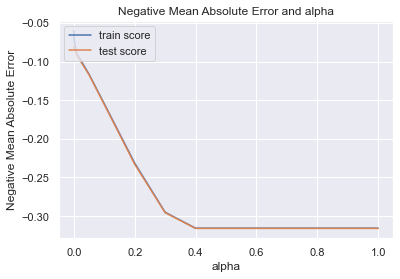

In [102]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,
but we will choose a low value of alpha to balance the trade-off between Bias-Variance
and to get the coefficients of smallest of features.

In [103]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)
lasso.coef_

array([-1.66272152e-02,  1.59414226e-02,  1.07131267e-01,  4.10382224e-02,
        0.00000000e+00,  2.70278236e-02,  0.00000000e+00,  4.94477563e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.23789826e-01,
        1.07519380e-02,  0.00000000e+00,  3.36682929e-03,  2.95324912e-03,
        0.00000000e+00, -3.35912532e-03,  3.30489754e-02,  4.53202844e-02,
        3.90308614e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.24292602e-04, -0.00000000e+00, -0.00000000e+00, -8.27783079e-02,
       -0.00000000e+00, -3.12827659e-02,  0.00000000e+00, -0.00000000e+00,
        1.23763328e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [104]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(i, 3) for i in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.027),
 ('MSSubClass', -0.017),
 ('LotArea', 0.016),
 ('OverallQual', 0.107),
 ('OverallCond', 0.041),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.049),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.124),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.003),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.003),
 ('Fireplaces', 0.033),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.004),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('property_age', -0.083),
 ('garage_age', -0.0),
 ('remodel_age', -0.031),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_No_alley_access', 0.0),
 ('Alley_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 

In [105]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(x_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8910076106999829
0.8635391905839304


In [106]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14264927159863097


In [107]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [108]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.027
1   MSSubClass  -0.017
2      LotArea   0.016
3  OverallQual   0.107
4  OverallCond   0.041

In [109]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0           constant  12.027
12         GrLivArea   0.124
3        OverallQual   0.107
8        TotalBsmtSF   0.049
20        GarageArea   0.045
..               ...     ...
100  HouseStyle_SLvl   0.000
18      KitchenAbvGr  -0.003
1         MSSubClass  -0.017
30       remodel_age  -0.031
28      property_age  -0.083

[253 rows x 2 columns]

In [110]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.027
12     GrLivArea   0.124
3    OverallQual   0.107
8    TotalBsmtSF   0.049
20    GarageArea   0.045
4    OverallCond   0.041
19    Fireplaces   0.033
6     BsmtFinSF1   0.027
2        LotArea   0.016
13  BsmtFullBath   0.011
21    WoodDeckSF   0.004
15      FullBath   0.003
16      HalfBath   0.003
18  KitchenAbvGr  -0.003
1     MSSubClass  -0.017
30   remodel_age  -0.031
28  property_age  -0.083

In [111]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(17, 2)

In [112]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'OverallCond', 'Fireplaces', 'BsmtFinSF1', 'LotArea', 'BsmtFullBath', 'WoodDeckSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'remodel_age', 'property_age']


In [113]:
x_train_lasso = x_train[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'OverallCond', 'Fireplaces', 'BsmtFinSF1', 'LotArea', 'BsmtFullBath', 'WoodDeckSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'remodel_age', 'property_age']]
                        
x_train_lasso.head()

GrLivArea  OverallQual  TotalBsmtSF  GarageArea  OverallCond  \
984    0.413618    -0.789413    -2.402963    0.319265    -0.513945   
1416   1.486071    -1.503944    -0.629470    0.417412     0.393906   
390   -0.294279    -0.789413    -0.437741   -0.405153     2.209607   
877    1.358765     2.068711     0.934034    1.249325    -0.513945   
567    0.029772     0.639649     1.059571    0.286549    -0.513945   

      Fireplaces  BsmtFinSF1   LotArea  BsmtFullBath  WoodDeckSF  FullBath  \
984    -0.955258   -0.984488 -0.042320     -0.828295   -0.733321  0.789648   
1416   -0.955258   -0.984488  0.075318     -0.828295   -0.733321  0.789648   
390    -0.955258   -0.439492 -0.208853      1.093726   -0.733321 -1.022106   
877     0.600274    1.661342 -0.167317      1.093726    0.707731  0.789648   
567    -0.955258   -0.979965 -0.037867     -0.828295   -0.733321  0.789648   

      HalfBath  KitchenAbvGr  MSSubClass  remodel_age  property_age  
984  -0.760878      4.361884    0.766073     0.411598     -0.150898  
1416 -0.760878      4.361884    3.130523     1.753150      2.902197  
390  -0.760878     -0.210481   -0.179708     1.657325      2.344104  
877   1.251704     -0.210481    0.056738    -0.929955     -1.037280  
567  -0.760878     -0.210481   -0.889043    -0.834129     -1.004451

In [114]:
x_train_lasso.shape

(1021, 16)

In [115]:
x_test_lasso = x_test[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 'OverallCond', 'Fireplaces', 'BsmtFinSF1', 'LotArea', 'BsmtFullBath', 'WoodDeckSF', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'remodel_age', 'property_age']]
                        
x_test_lasso.head()

GrLivArea  OverallQual  TotalBsmtSF  GarageArea  OverallCond  Fireplaces  \
789   1.094510    -0.074882    -0.503933   -0.124733     2.209607   -0.955258   
425  -0.251844     0.639649    -0.917064   -1.078162     2.209607    2.155805   
204  -0.454375    -0.789413    -0.759572   -1.078162     1.301757   -0.955258   
118   3.283781     0.639649     1.415639    0.576317    -0.513945    2.155805   
244   1.138874     0.639649    -0.239165   -0.035934    -0.513945    2.155805   

     BsmtFinSF1   LotArea  BsmtFullBath  WoodDeckSF  FullBath  HalfBath  \
789    0.299983  0.159068     -0.828295    0.308309  0.789648  1.251704   
425   -0.984488 -0.695574     -0.828295   -0.733321 -1.022106  1.251704   
204   -0.278933 -0.683762     -0.828295   -0.733321 -1.022106  1.251704   
118    2.339760  0.175625      1.093726    2.140952  2.601402 -0.760878   
244    0.587180 -0.162863      1.093726   -0.733321  0.789648  1.251704   

     KitchenAbvGr  MSSubClass  remodel_age  property_age  
789     -0.210481    0.056738    -1.121605      0.144563  
425     -0.210481    0.056738    -0.307091      0.866801  
204     -0.210481   -0.179708     1.705237      0.833972  
118     -0.210481    0.056738    -0.163353     -0.544845  
244     -0.210481    0.056738    -0.738304     -0.676161

### Final selected features using Ridge is

In [116]:
paraRidge_asc.head(12)

Variable    Coef
0                constant  11.503
33            MSZoning_RL   0.161
32            MSZoning_RH   0.144
34            MSZoning_RM   0.142
31            MSZoning_FV   0.138
56   Neighborhood_Crawfor   0.130
72   Neighborhood_StoneBr   0.109
242        SaleType_ConLD   0.104
114   Exterior1st_BrkFace   0.099
84        Condition2_Norm   0.093
83       Condition2_Feedr   0.092
35            Street_Pave   0.091

In [117]:
paraRidge_desc.head()

Variable   Coef
86        Condition2_PosN -0.329
60   Neighborhood_MeadowV -0.135
217         GarageQual_Fa -0.084
59    Neighborhood_IDOTRR -0.083
113   Exterior1st_BrkComm -0.080

### Final selected features using Lasso Regression model is

In [118]:
pred

Variable   Coeff
0       constant  12.027
12     GrLivArea   0.124
3    OverallQual   0.107
8    TotalBsmtSF   0.049
20    GarageArea   0.045
4    OverallCond   0.041
19    Fireplaces   0.033
6     BsmtFinSF1   0.027
2        LotArea   0.016
13  BsmtFullBath   0.011
21    WoodDeckSF   0.004
15      FullBath   0.003
16      HalfBath   0.003
18  KitchenAbvGr  -0.003
1     MSSubClass  -0.017
30   remodel_age  -0.031
28  property_age  -0.083

### While comparing the R2_scores of both Ridge and Lasso regression we can conclude that Ridge is performing better than Lasso but Lasso provides us a better option of feature selection which is much importing in model building. Hence we finalize the features selected by Lasso regression model 

# The Final Model Equation is :-

Log(y) = costant + 0.124 x GrLivArea + 0.107 x OverallQual + 0.049 x TotalBsmtSF + 0.045 x GarageArea + 0.041 x OverallCond +   0.033 x Fireplaces + 0.027 x BsmtFinSF1 + 0.016 x LotArea + 0.011 x BsmtFullBath + 0.004 x WoodDeckSF + 0.003 x FullBath + 0.003 x HalfBath - 0.003 x KitchenAbvGr - 0.017 x MSSubClass - 0.031 x remodel_age - 0.083 x property_age + Error term(RSS + alpha * (sum of absolute value of coefficients)

- Here we can describe from the equation the positive values means increase in the price of the sale and negative value means decrease in the value of the sale price 

- From this analysis we can also conclude that when the market value of the property becomes lower than the predicted value then we can buy that property

- Here all the expensive and luxary needs describes that the price will be huge, If we need a house with minimum needs and far from the city the price is less

- Here we can conclude that the older the properties become the selling price will decrease 

- The new and remodelled houses are costlier than the old ones

- The Optimal value of the ridge regression is Alpha = 2
- The optimal value of the Lasso regression is Alpha = 0.01

                        ----------------------x--------------------x--------------------

# THIS WAS JUST FOR THE ROUGH WORK WHICH IS USED FOR SOLVING THE SUBJECTIVE QUESTIONS

# Problem Statement - Part II

After Doubling Ridge and Lasso Alpha values we get

In [127]:
# ridge regression
lm1 = Ridge(alpha=4)
lm1.fit(x_train, y_train)

# predicting train and test data
y_train_pred = lm1.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRidge1 = pd.DataFrame(mod_ridge)
paraRidge1.columns = ['Variable', 'Coef']
res1=paraRidge1.sort_values(by=['Coef'], ascending = False)
res1.head(16)

0.9445861193262779
0.8890969699007841
RMSE = 0.1285989116082882


Variable    Coef
0                    constant  12.027
12                  GrLivArea   0.124
3                 OverallQual   0.107
8                 TotalBsmtSF   0.049
20                 GarageArea   0.045
4                 OverallCond   0.041
19                 Fireplaces   0.033
6                  BsmtFinSF1   0.027
2                     LotArea   0.016
13               BsmtFullBath   0.011
21                 WoodDeckSF   0.004
15                   FullBath   0.003
16                   HalfBath   0.003
187              HeatingQC_Po  -0.000
177  BsmtFinType2_No_Basement  -0.000
165           BsmtExposure_Mn   0.000

In [123]:
# lasso regression
lm1 = Lasso(alpha=0.02)
lm1.fit(x_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm1.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para1 = pd.DataFrame(mod)
para1.columns = ['Variable', 'Coeff']
pred1 = pd.DataFrame(para1[(para1['Coeff'] != 0)])
pred1

0.8793617901398336
0.855162028257104
RMSE : 0.1469625923622438


Variable   Coeff
0       constant  12.027
1     MSSubClass  -0.017
2        LotArea   0.016
3    OverallQual   0.107
4    OverallCond   0.041
6     BsmtFinSF1   0.027
8    TotalBsmtSF   0.049
12     GrLivArea   0.124
13  BsmtFullBath   0.011
15      FullBath   0.003
16      HalfBath   0.003
18  KitchenAbvGr  -0.003
19    Fireplaces   0.033
20    GarageArea   0.045
21    WoodDeckSF   0.004
28  property_age  -0.083
30   remodel_age  -0.031

In [124]:
len(pred1)

17

In [132]:
# ridge regression
lm1 = Ridge(alpha=2)
lm1.fit(x_train, y_train)

# predicting train and test data
y_train_pred = lm1.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

paraRidge1 = pd.DataFrame(mod_ridge)
paraRidge1.columns = ['Variable', 'Coef']
res1=paraRidge1.sort_values(by=['Coef'], ascending = False)
res1.head(16)

0.9482290910432771
0.8884603744201733
RMSE = 0.12896746935928943


Variable    Coef
0                    constant  12.027
12                  GrLivArea   0.124
3                 OverallQual   0.107
8                 TotalBsmtSF   0.049
20                 GarageArea   0.045
4                 OverallCond   0.041
19                 Fireplaces   0.033
6                  BsmtFinSF1   0.027
2                     LotArea   0.016
13               BsmtFullBath   0.011
21                 WoodDeckSF   0.004
15                   FullBath   0.003
16                   HalfBath   0.003
187              HeatingQC_Po  -0.000
177  BsmtFinType2_No_Basement  -0.000
165           BsmtExposure_Mn   0.000

In [129]:
# lasso regression
lm1 = Lasso(alpha=0.01)
lm1.fit(x_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm1.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para1 = pd.DataFrame(mod)
para1.columns = ['Variable', 'Coeff']
pred1 = pd.DataFrame(para1[(para1['Coeff'] != 0)])
pred1

0.8910076106999829
0.8635391905839304
RMSE : 0.14264927159863097


Variable   Coeff
0       constant  12.027
1     MSSubClass  -0.017
2        LotArea   0.016
3    OverallQual   0.107
4    OverallCond   0.041
6     BsmtFinSF1   0.027
8    TotalBsmtSF   0.049
12     GrLivArea   0.124
13  BsmtFullBath   0.011
15      FullBath   0.003
16      HalfBath   0.003
18  KitchenAbvGr  -0.003
19    Fireplaces   0.033
20    GarageArea   0.045
21    WoodDeckSF   0.004
28  property_age  -0.083
30   remodel_age  -0.031

In [138]:
x_t = x_train.drop(['GrLivArea','OverallQual','TotalBsmtSF','property_age','remodel_age'],axis=1)

In [139]:
x_te = x_test.drop(['GrLivArea','OverallQual','TotalBsmtSF','property_age','remodel_age'],axis=1)

In [144]:
q = X.drop(['GrLivArea','OverallQual','TotalBsmtSF','property_age','remodel_age'],axis=1)
cols = q.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.027),
 ('MSSubClass', -0.017),
 ('LotArea', 0.016),
 ('OverallCond', 0.107),
 ('MasVnrArea', 0.041),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.027),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.049),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.124),
 ('HalfBath', 0.011),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.003),
 ('Fireplaces', 0.003),
 ('GarageArea', 0.0),
 ('WoodDeckSF', -0.003),
 ('OpenPorchSF', 0.033),
 ('EnclosedPorch', 0.045),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('garage_age', 0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', -0.083),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -0.031),
 ('Alley_No_alley_access', 0.0),
 ('Alley_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0),
 ('Utilities_NoSeWa', 0.0),
 ('LotConfig_CulDSac', -0.0),
 ('L

constant	12.027
12	GrLivArea	0.124
3	OverallQual	0.107
8	TotalBsmtSF	0.049
20	GarageArea	0.045
4	OverallCond	0.041
19	Fireplaces	0.033
6	BsmtFinSF1	0.027
2	LotArea	0.016
13	BsmtFullBath	0.011
21	WoodDeckSF	0.004
15	FullBath	0.003
16	HalfBath	0.003
18	KitchenAbvGr	-0.003
1	MSSubClass	-0.017
30	remodel_age	-0.031
28	property_age	-0.083

In [146]:
# lasso regression
lm1 = Lasso(alpha=0.01)
lm1.fit(x_t, y_train)

# prediction on the test set(Using R2)
y_train_pre = lm1.predict(x_t)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pre))
y_test_pre = lm1.predict(x_te)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pre))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pre)))

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para1 = pd.DataFrame(mod)
para1.columns = ['Variable', 'Coeff']
pred1 = pd.DataFrame(para1[(para1['Coeff'] != 0)])
pred1.sort_values(by=['Coeff'], ascending = False)

0.8522390741586945
0.8167495560111402
RMSE : 0.16530580493693625


Variable   Coeff
0        constant  12.027
12       FullBath   0.124
3     OverallCond   0.107
8        2ndFlrSF   0.049
20  EnclosedPorch   0.045
4      MasVnrArea   0.041
19    OpenPorchSF   0.033
6      BsmtFinSF2   0.027
2         LotArea   0.016
13       HalfBath   0.011
21      3SsnPorch   0.004
16     Fireplaces   0.003
15   KitchenAbvGr   0.003
18     WoodDeckSF  -0.003
1      MSSubClass  -0.017
30    Street_Pave  -0.031
28    MSZoning_RL  -0.083